In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv').set_index("customer_id")
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [ ]:
df["default"].value_counts(normalize=True)

,proportion
default,
0,0.8149
1,0.1851


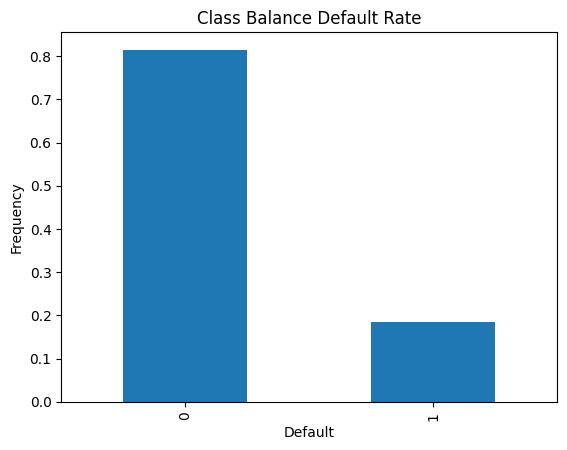

In [ ]:
df["default"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Default")
plt.ylabel("Frequency")
plt.title("Class Balance Default Rate")
plt.show()

Text(0.5, 1.0, 'Total Debt Outstanding vs Default')

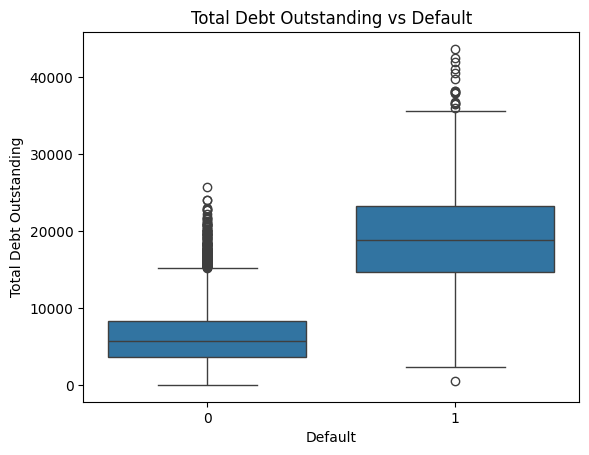

In [ ]:
sns.boxplot(y="total_debt_outstanding", x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Total Debt Outstanding")
plt.title("Total Debt Outstanding vs Default")

Text(0.5, 1.0, 'Loan amount Outstanding vs Default')

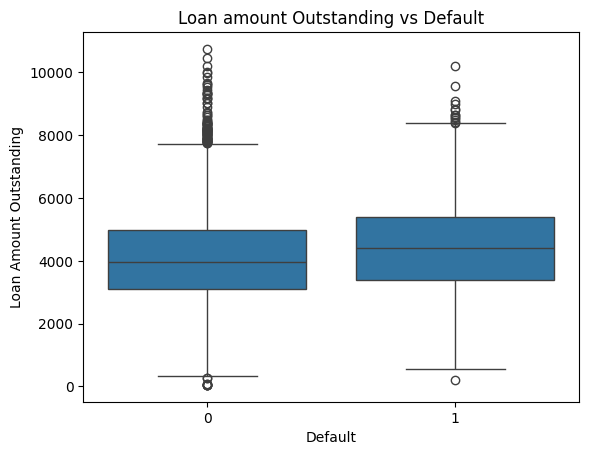

In [ ]:
sns.boxplot(y="loan_amt_outstanding", x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Loan Amount Outstanding")
plt.title("Loan amount Outstanding vs Default")

Text(0.5, 1.0, 'Fico Score vs Default')

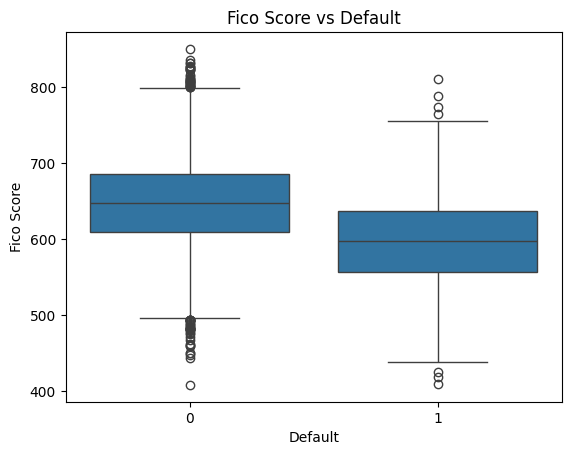

In [ ]:
sns.boxplot(y="fico_score", x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Fico Score")
plt.title("Fico Score vs Default")

In [ ]:
credit_line_pivot= pd.pivot_table(df, index="credit_lines_outstanding", values="default", aggfunc="mean").sort_values(by="default")
credit_line_pivot

,default
credit_lines_outstanding,
0,0.000000
1,0.000000
2,0.007761
3,0.228715
4,0.851240
5,0.998458


Text(0.5, 1.0, 'Credit Lines Outstanding vs Default Rate')

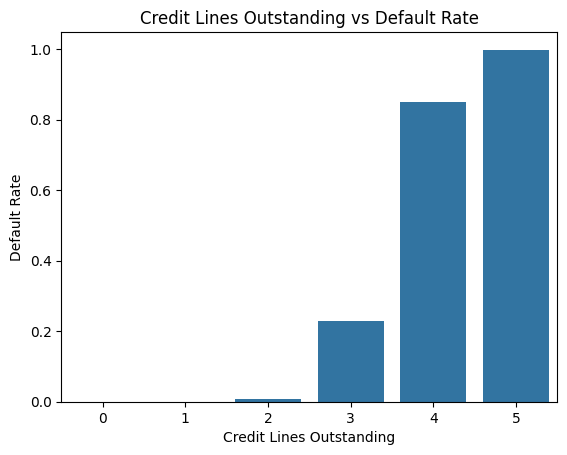

In [ ]:
sns.barplot(x=credit_line_pivot.index, y=credit_line_pivot["default"])
plt.xlabel("Credit Lines Outstanding")
plt.ylabel("Default Rate")
plt.title("Credit Lines Outstanding vs Default Rate")

In [ ]:
baseline_acc = df["default"].value_counts(normalize=True).max()
print(f"Baseline Accuracy Score is {baseline_acc}.")

Baseline Accuracy Score is 0.8149.


In [ ]:
X = df.drop("default", axis=1)
y = df["default"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 6)
X_test shape: (2000, 6)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
acc_baseline_train =y_train.value_counts(normalize=True).max()
print(f"accuracy score baseline {acc_baseline_train}")

accuracy score baseline 0.812125


In [ ]:
over_sample = RandomOverSampler(sampling_strategy="minority", random_state=42)
X_over, y_over = over_sample.fit_resample(X_train, y_train)

In [ ]:
print(f"X_over shape: {X_over.shape}")
print(f"y_over shape: {y_over.shape}")

X_over shape: (12994, 6)
y_over shape: (12994,)


In [ ]:
y_over.value_counts(normalize=True)

,proportion
default,
0,0.5
1,0.5


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_over, y_over)


LogisticRegression(max_iter=1000)

In [ ]:
over_train_acc =model.score(X_over, y_over)
print(f"accuracy score for train over sample {over_train_acc}")

accuracy score for train over sample 0.9979221179005695


In [ ]:
train_acc =model.score(X_train, y_train)
print(f"accuracy score for training data is {train_acc}")

accuracy score for training data is 0.996625


In [ ]:
test_acc = model.score(X_test, y_test)
print(f"accuracy score for test data is {test_acc}")

accuracy score for test data is 0.999


In [ ]:
prediction = pd.Series(model.predict(X_test))
prediction.head()

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
d_params= range(1,16)
train_acc = []
test_acc = []

for d in d_params:
  model_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  model_clf.fit(X_over,y_over)
  train_acc.append(model_clf.score(X_train,y_train))
  test_acc.append(model_clf.score(X_test,y_test))

print(f"traing accuracy{train_acc}")
print(f"test_acc{test_acc}")

traing accuracy[0.945375, 0.9445, 0.989, 0.9885, 0.995375, 0.996625, 0.998125, 0.9985, 0.999125, 0.999875, 1.0, 1.0, 1.0, 1.0, 1.0]
test_acc[0.947, 0.9465, 0.9845, 0.988, 0.9945, 0.995, 0.9935, 0.995, 0.995, 0.995, 0.9945, 0.9945, 0.9945, 0.9945, 0.9945]


In [ ]:
series =  pd.Series(test_acc, index=d_params)
series.head()

,0
1,0.9470
2,0.9465
3,0.9845
4,0.9880
5,0.9945


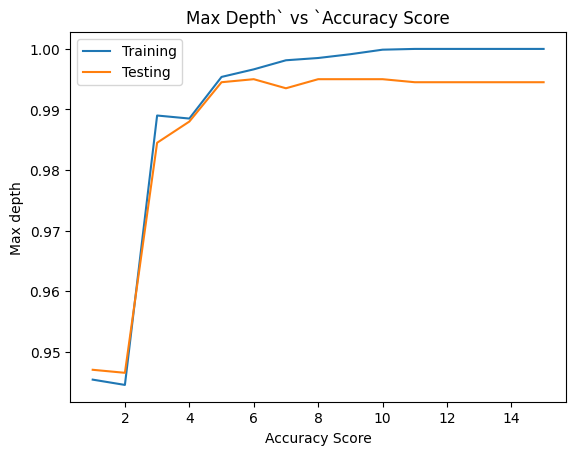

In [ ]:
plt.plot(d_params, train_acc , label="Training" )
plt.plot(d_params, test_acc, label="Testing")
plt.xlabel("Accuracy Score")
plt.ylabel("Max depth")
plt.title("Max Depth` vs `Accuracy Score")
plt.legend()
plt.show()

In [ ]:
best_model_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
best_model_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
best_model_clf.score(X_train, y_train)


0.997

In [ ]:
best_model_clf.score(X_test, y_test)

0.9945

In [ ]:
pred = pd.Series(best_model_clf.predict(X_test))
pred.head()

,0
0,0
1,0
2,1
3,0
4,0


In [ ]:
model.score(X_train,y_train)

0.996625

In [ ]:
model.score(X_test,y_test)

0.999

In [ ]:
probabilities_logistic_model = pd.DataFrame(model.predict_proba(X_test))
probabilities_logistic_model.head()


,0,1
0,1.000000,1.070862e-15
1,0.999473,5.270038e-04
2,0.000000,1.000000e+00
3,1.000000,5.717762e-18
4,1.000000,1.955724e-16


In [ ]:
predictions_decision_tree =pd.DataFrame(best_model_clf.predict_proba(X_test))
predictions_decision_tree.head()

,0,1
0,1.000000,0.000000
1,0.980609,0.019391
2,0.000000,1.000000
3,1.000000,0.000000
4,1.000000,0.000000


In [ ]:
confusion_matrix(y_test, prediction)

array([[1650,    2],
       [   0,  348]])

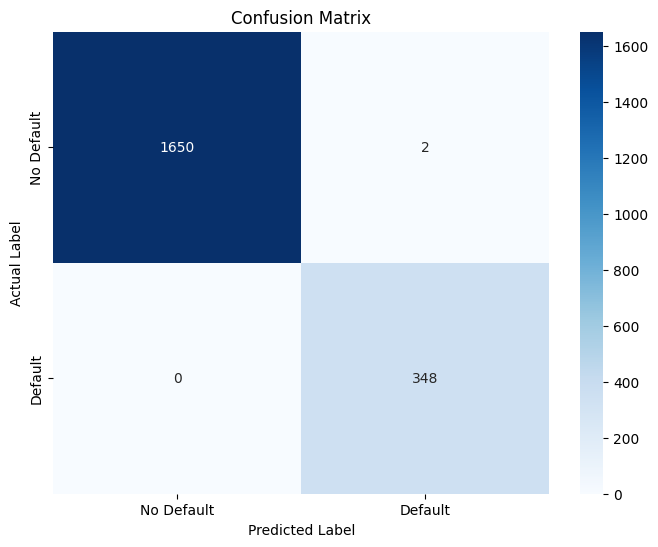

In [ ]:
cm_logistic=confusion_matrix(y_test, prediction)
class_names = ["No Default", "Default"]

# Create visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True,cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Financial Impact Analysis
Prevented Losses (True Positives):
Assuming average loan amount: $10,000

348 defaulters × $10,000 = $3,480,000 saved

This is real money saved from bad loans

Opportunity Cost (False Positives):
2 good customers rejected

Lost interest income, but avoided risk

Key Performance Metrics
Recall (Sensitivity): 348 / (348 + 0) = 100%


Precision: 348 / (348 + 2) = 99.43%

Accuracy: (1650 + 348) / 2000 = 99.9%

Almost perfect overall performance



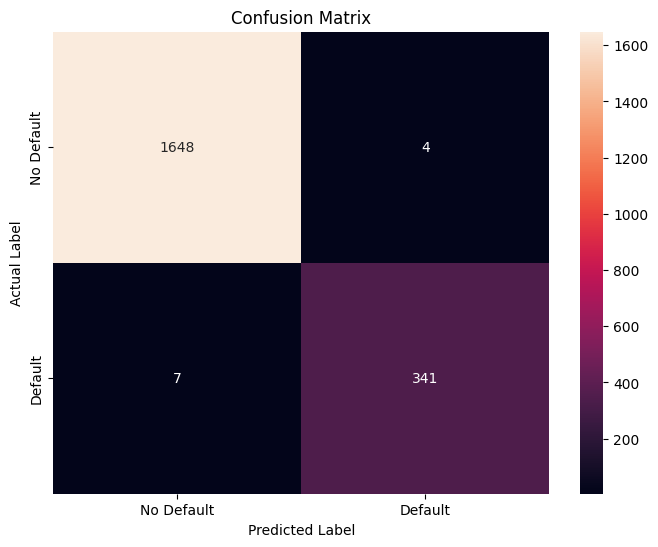

In [ ]:
cm_decision=confusion_matrix(y_test, pred)
class_names = ["No Default", "Default"]

# Create visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decision, annot=True, fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
def probability_of_default(data):
  """ data should be in a CSV format """
  df= pd.read_csv(data).set_index("customer_id")

  X = df.drop("default", axis=1)
  y = df["default"]

  "we use the logistic model because it gave better results"
  model.fit(X, y)

  "we get the probabilities of default"
  probabilities = pd.DataFrame(model.predict_proba(X))


  return probabilities



  probabilities = pd.DataFrame(model.predict_proba(X_test))


  return probabilities



In [ ]:
probability_of_default("Task 3 and 4_Loan_Data.csv")

,0,1
0,1.000000e+00,2.768264e-20
1,2.259082e-12,1.000000e+00
2,1.000000e+00,9.436279e-19
3,1.000000e+00,7.025709e-21
4,1.000000e+00,6.848277e-13
...,...,...
9995,1.000000e+00,6.403216e-18
9996,1.000000e+00,1.555498e-20
9997,9.999998e-01,2.195184e-07
9998,1.000000e+00,2.897340e-15
